In [19]:
import pandas as pd

% matplotlib inline

import seaborn as sns
sns.set()

In [20]:
df = pd.read_csv("../data/BeijingPM20100101_20151231.csv")
df = df[['year', 'month', 'day', 'PM_US Post']]
df.head()

,year,month,day,PM_US Post
0,2010,1,1,NaN
1,2010,1,1,NaN
2,2010,1,1,NaN
3,2010,1,1,NaN
4,2010,1,1,NaN


In [21]:
df.isna().sum()

year             0
month            0
day              0
PM_US Post    2197
dtype: int64

In [22]:
df = df.dropna()
df = df.reset_index(drop=True)
df.head()

,year,month,day,PM_US Post
0,2010,1,1,129.0
1,2010,1,2,148.0
2,2010,1,2,159.0
3,2010,1,2,181.0
4,2010,1,2,138.0


In [23]:
df = df.groupby(["year","month"])[["day","PM_US Post"]].mean()
df = df.reset_index()
df.head()

,year,month,day,PM_US Post
0,2010,1,15.649847,90.403670
1,2010,2,14.500745,97.239940
2,2010,3,15.328632,94.046544
3,2010,4,15.540390,80.072423
4,2010,5,15.922659,87.071913


In [24]:
df.loc[:,"time"] = pd.to_datetime(df[['year', 'month', 'day']])
# df["PM_US Post"] = df.groupby("time")["PM_US Post"].mean()
df.head()

,year,month,day,PM_US Post,time
0,2010,1,15.649847,90.403670,2010-01-15
1,2010,2,14.500745,97.239940,2010-02-14
2,2010,3,15.328632,94.046544,2010-03-15
3,2010,4,15.540390,80.072423,2010-04-15
4,2010,5,15.922659,87.071913,2010-05-15


In [25]:
df = df.set_index("time")
df = df[["PM_US Post"]]
df.columns = ["PM"]
df.head()

,PM
time,
2010-01-15,90.403670
2010-02-14,97.239940
2010-03-15,94.046544
2010-04-15,80.072423
2010-05-15,87.071913


In [26]:
df = df.dropna()

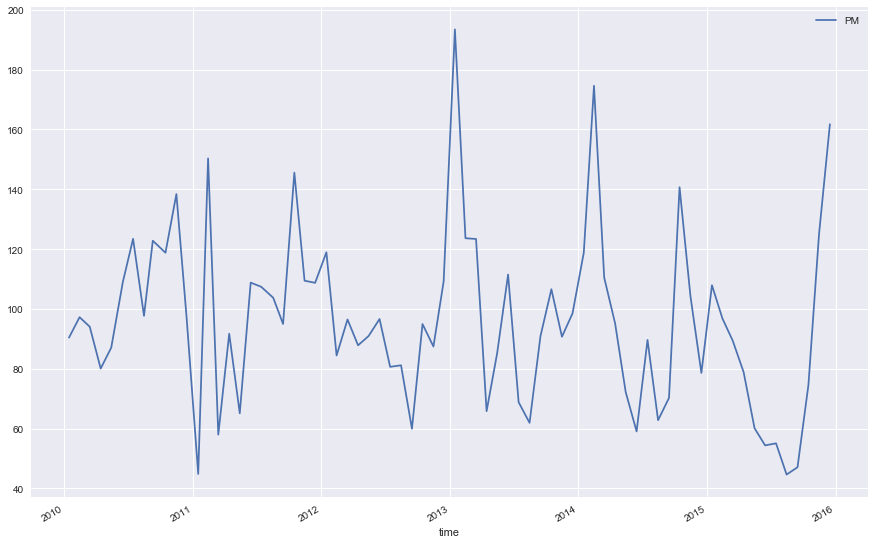

In [27]:
df.plot(figsize=(15,10))

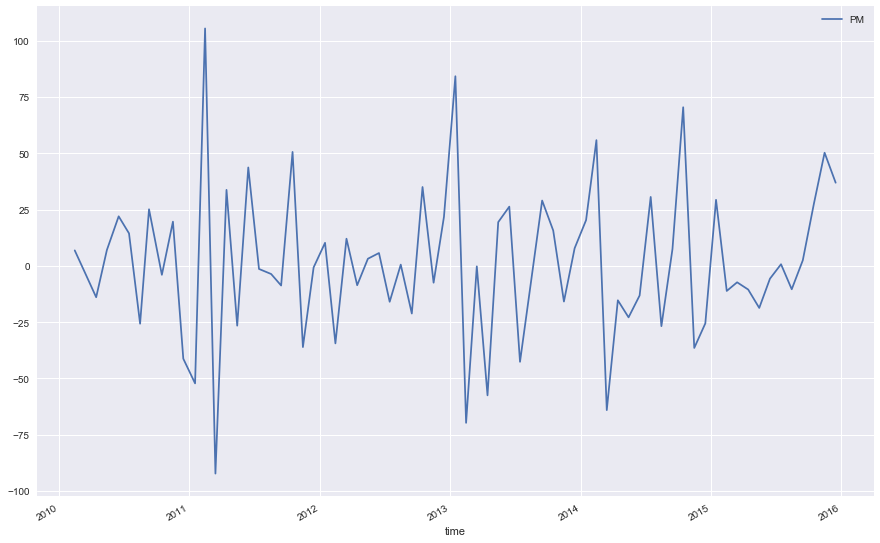

In [28]:
df.diff().plot(figsize=(15,10))

In [29]:
df.diff().describe()

,PM
count,71.000000
mean,1.004576
std,34.126568
min,-92.298191
25%,-15.933247
50%,-0.713565
75%,21.009107
max,105.416479


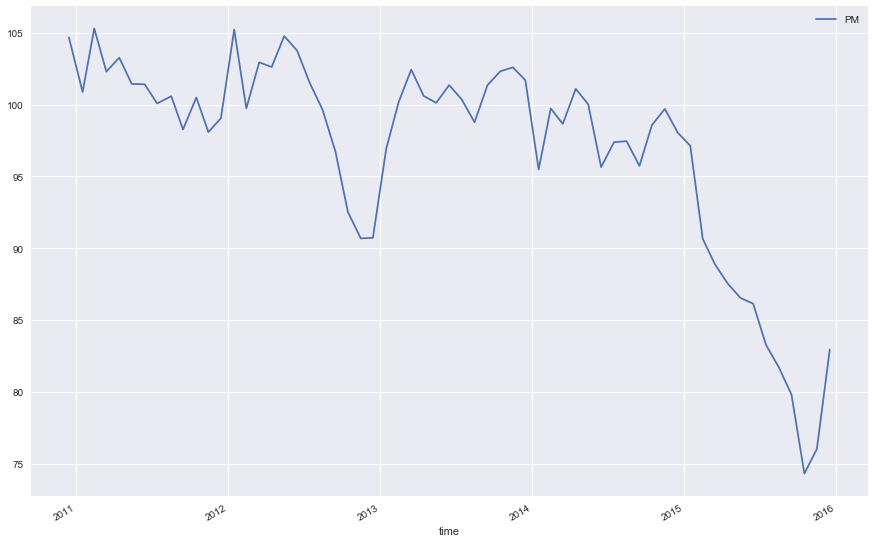

In [30]:
df.rolling(12).mean().plot(figsize=(15,10))

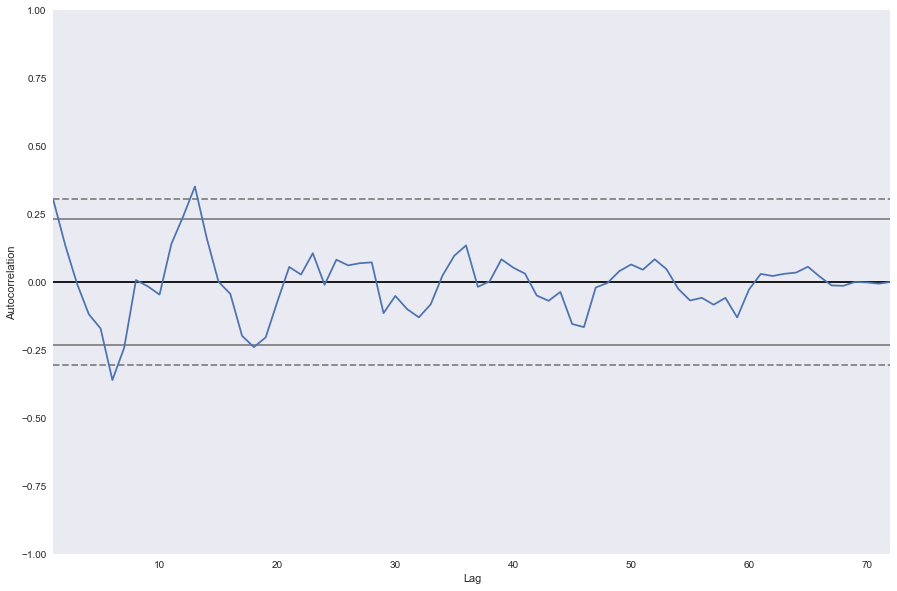

In [31]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15,10))
pd.plotting.autocorrelation_plot(df)

In [32]:
df["PM"].autocorr(lag=13)

0.4404146027239071

/anaconda3/envs/PythonData/lib/python3.6/site-packages/scipy/signal/signaltools.py:1341: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out_full[ind] += zi
/anaconda3/envs/PythonData/lib/python3.6/site-packages/scipy/signal/signaltools.py:1344: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out = out_full[ind]
/anaconda3/envs/PythonData/lib/python3.6/site-packages/scipy/signal/signaltools.py:1350: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future

predicted=97.391292, expected=98.505525
predicted=127.051241, expected=118.773406
predicted=148.444619, expected=174.594918
predicted=115.533228, expected=110.473755
predicted=102.245854, expected=95.142259
predicted=95.937079, expected=72.239892
predicted=98.659219, expected=59.048364
predicted=74.989099, expected=89.641791
predicted=50.445752, expected=62.815825
predicted=88.402535, expected=70.258741
predicted=105.615479, expected=140.693136


/anaconda3/envs/PythonData/lib/python3.6/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=101.456173, expected=104.191218
predicted=105.140746, expected=78.608939
predicted=104.703824, expected=107.914750


/anaconda3/envs/PythonData/lib/python3.6/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=113.039641, expected=96.737237
predicted=135.614346, expected=89.400281
predicted=86.603451, expected=78.855134
predicted=69.329094, expected=60.128378
predicted=89.864352, expected=54.397436
predicted=74.871184, expected=55.083558
predicted=55.540184, expected=44.647376


/anaconda3/envs/PythonData/lib/python3.6/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=69.740172, expected=47.089261
predicted=90.010350, expected=74.602510
predicted=97.013114, expected=124.822222
predicted=93.217848, expected=161.728532
Test MSE: 645.646


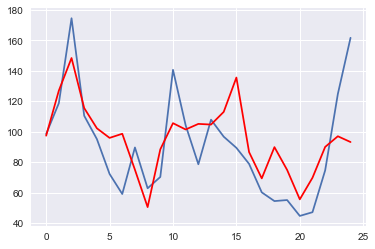

In [33]:
series = df["PM"]
X = series.values
size = int(len(X) * 0.66)
train, test = X[0:size], X[size:len(X)]

from pandas import read_csv
from pandas import datetime
from matplotlib import pyplot
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error

X = series.values
size = int(len(X) * 0.66)
train, test = X[0:size], X[size:len(X)]
history = [x for x in train]
predictions = list()
for t in range(len(test)):
	model = ARIMA(history, order=(12,1,0))
	model_fit = model.fit(disp=0)
	output = model_fit.forecast()
	yhat = output[0]
	predictions.append(yhat)
	obs = test[t]
	history.append(obs)
	print('predicted=%f, expected=%f' % (yhat, obs))
error = mean_squared_error(test, predictions)
print('Test MSE: %.3f' % error)
# plot
pyplot.plot(test)
pyplot.plot(predictions, color='red')
pyplot.show()